In [1]:
from pathlib import Path
from ipyleaflet import Map, LayersControl, LayerGroup, Polygon, GeoJSON, LegendControl, FullScreenControl, basemaps, basemap_to_tiles
from ipywidgets.embed import embed_minimal_html
import json
import random
from tqdm.auto import tqdm
import pandas as pd
from itertools import chain
from matplotlib import cm
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
#from shapely.geometry import Point, LineString
from geojson import Feature, LineString
import numpy as np
import geopandas as gpd
from geojson_length import calculate_distance, Unit
from shapely.geometry import Point as geoPoint, Polygon as geoPolygon
from shapely import wkt
import geojson
from pyproj import Geod
from area import area
import random
import networkx as nx
import matplotlib.pyplot as plt
import math
import networkx as nx
import matplotlib.cm as cm
import numpy as np
from matplotlib.colors import ListedColormap
from matplotlib.cm import ScalarMappable

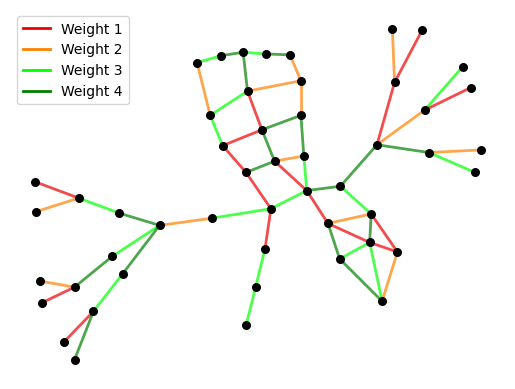

In [2]:
weight =  {
('a','c'): 1,
('b','c'): 2,
('c','d'): 3,
('d','e'): 4,
('f','h'): 2,
('g','h'): 1,
('h','i'): 4,
('i','e'): 3,
('j','l'): 1,
('k','l'): 4,
('l','m'): 3,
('m','e'): 4,
('e','n'): 2,
('n','o'): 3,
('o','p'): 1,
('p','q'): 4,
('q','r'): 3,
('q','k1'): 2,
('q','t'): 2,
('p','s'): 1,
('s','v'): 3,
('v','e1'): 2,
('e1','d1'): 3,
('d1','c1'): 4,
('c1','b1'): 3,
('b1','a1'): 4,
('o','k1'): 3,
('k1','q'): 1,
('k1','r'): 3,
('q','r'): 2,
('q','t'): 4,
('t','w'): 1,
('w','c1'): 4,
('v','w'): 3,
('t','s'): 1,
('r','u'): 4,
('u','z'): 2,
('z','a1'): 2,
('w','z'): 2,
('u','t'): 4,
('o','g1'): 1,
('g1','h1'): 3,
('h1','i1'): 3,
('k1','f1'): 4,
('f1','l1'): 3,
('l1','n1'): 1,
('n1','o1'): 2,
('k1','j1'): 1,
('j1','m1'): 4,
('m1','o1'): 4,
('j1','l1'): 2,
('j1','b2'): 1,
('l1','b2'): 4,
('m1','b2'): 3,
('b2','o1'): 3,
('b2','n1'): 1,
('f1','p1'): 4,
('p1','q1'): 1,
('q1','r1'): 2,
('q1','s1'): 1,
('p1','t1'): 2,
('t1','u1'): 3,
('t1','v1'): 1,
('p1','w1'): 4,
('w1','z1'): 2,
('w1','a2'): 3,
}
G = nx.Graph()
for endpoints, weight in weight.items():
    G.add_edge(endpoints[0], endpoints[1], weight=weight)

# shift_weight =  {1: 4, 2: 3, 3: 2, 4: 1}
# for endpoint1, endpoint2, data in G.edges(data=True):
#     data['weight'] = shift_weight[data['weight']]
colors =  {1: '#EE0000', 2: '#FF8000', 3: '#00FF00', 4: '#008000'}

# Get the positions of the nodes (using the node coordinates as positions)
pos = {
'a' : np.array([-5.0215337305401,1.223265423794]),
'b' : np.array([-5.001068614261,0.7730328656544]),
'c' : np.array([-4.2438593119354,0.9776840284451]),
'd' : np.array([-3.527580242168,0.7525677493754]),
'e' : np.array([-2.8113011724005,0.5683817028637]),
'f' : np.array([-4.9340970450932,-0.2655990708621]),
'g' : np.array([-4.8978310930543,-0.5919926392119]),
'h' : np.array([-4.3175758604326,-0.3562639509593]),
'i' : np.array([-3.6466557477137,0.1061269375362]),
'j' : np.array([-4.5079721086366,-1.1813143598433]),
'k' : np.array([-4.3175758604326,-1.444242512125]),
'l' : np.array([-3.9821158040731,-0.7189234713479]),
'm' : np.array([-3.4653259875194,-0.1568012147456]),
'n' : np.array([-1.8893288932625,0.6754002207058]),
'o' : np.array([-0.8403397686802,0.8178555339206]),
'p' : np.array([-1.2806561913444,1.3617758207411]),
'q' : np.array([-0.7755873535826,1.530132099995]),
'r' : np.array([-0.2575680328012,1.6078349981123]),
's' : np.array([-1.6950716479695,1.7632407943467]),
't' : np.array([-1,2]),
'u' : np.array([-0.3093699648793,2.2165077000304]),
'v' : np.array([-1.9152298593016,2.2165077000304]),
'w' : np.array([-1.2547552253053,2.5791212245774]),
'z' : np.array([-0.3093699648793,2.7345270208118]),
'a1' : np.array([-0.5036272101723,3.1230415113978]),
'b1' : np.array([-0.930993149817,3.1359919944174]),
'c1' : np.array([-1.3324581234225,3.1618929604564]),
'd1' : np.array([-1.7209726140086,3.1100910283783]),
'e1' : np.array([-2.1483385536532,3.006487164222]),
'f1' : np.array([0.3899561181756,1.1545680924285]),
'g1' : np.array([-0.9439436328365,0.222133315022]),
'h1' : np.array([-1.1122999120905,-0.360638420857]),
'i1' : np.array([-1.2806561913444,-0.9304596737166]),
'j1' : np.array([0.1697979068435,0.5976973225885]),
'k1' : np.array([-0.205766100723,1.0898156773309]),
'l1' : np.array([0.933876404996,0.7401526358034]),
'm1' : np.array([0.377005635156,0.0667275187876]),
'n1' : np.array([1.4000937936993,0.1703313829439]),
'o1' : np.array([1.1281336502891,-0.5678461491696]),
'p1' : np.array([1.0374802691523,1.7761912773662]),
'q1' : np.array([1.3482918616211,2.7086260547727]),
'r1' : np.array([1.3094404125625,3.5115560019839]),
's1' : np.array([1.8404102163635,3.4986055189643]),
't1' : np.array([1.8792616654221,2.2942105981476]),
'u1' : np.array([2.5526867824379,2.9417347491243]),
'v1' : np.array([2.6951420956528,2.6309231566555]),
'w1' : np.array([1.9569645635393,1.6596369301904]),
'z1' : np.array([2.8764488579263,1.698488379249]),
'a2' : np.array([2.77284499377,1.3617758207411]),
'b2' : np.array([0.907975438957,0.3127866961588])
}

nx.draw_networkx_nodes(G, pos, node_color='black', node_size=30)
for u, v, data in G.edges(data=True):
    nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], edge_color=colors[data['weight']], width=2, alpha=0.7)

# Add a legend for the edge colors
handles = [plt.Line2D([], [], color=colors[weight], lw=2) for weight in colors]
labels = [f"Weight {weight}" for weight in colors]
plt.legend(handles, labels)

# Show the plot
# plt.show()

# plt.legend(loc='upper left')
plt.axis('off')
plt.savefig('./Images/academic_example.png', dpi=800)
plt.show()

In [3]:
def modify_graph(G):
    # Define a dictionary to map the old values to the new values
    value_map = {1: 4, 2: 3, 3: 2, 4: 1}

    # Iterate through each edge in the graph and modify the values
    for endpoint1, endpoint2, data in G.edges(data=True):
        # Modify the value of the weight
        data['weight'] = value_map[data['weight']]

    return G
modify_graph(G)

In [26]:
edge_betweenness = nx.edge_betweenness_centrality(G, weight='weight')

# Get the minimum and maximum betweenness centrality values
min_betweenness = min(edge_betweenness.values())
max_betweenness = max(edge_betweenness.values())
norm = plt.Normalize(vmin=min_betweenness, vmax=max_betweenness)

s_bca = sum(edge_betweenness.values())
# Create a colormap for the edge colors
edge_color_map = ListedColormap(cm.get_cmap('nipy_spectral_r', 256)(np.linspace(0.05, 0.50, 256)))
vec_aux = [edge_color_map (norm(edge_betweenness[i])) for i in range(len(G.edges()))]
# vec_aux = [edge_color_map((v - min_betweenness) / (max_betweenness - min_betweenness)) * 100  for v in edge_betweenness.values()]
# vec_aux = [edge_color_map((v*100) / s_bca) for v in edge_betweenness.values()]
# Draw the graph with the edges colored according to their betweenness centrality
# pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color='black', node_size=30)
# nx.draw_networkx_edges(G, pos, edge_color=[edge_color_map((v - min_betweenness) / (max_betweenness - min_betweenness)) for v in edge_betweenness.values()], width=2)
nx.draw_networkx_edges(G, pos, edge_color=vec_aux, width=2)
plt.colorbar(cm.ScalarMappable(norm=None, cmap=edge_color_map))
plt.axis('off')
plt.show()

C:\Users\camperom\AppData\Local\Temp\ipykernel_14832\121621850.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  edge_color_map = ListedColormap(cm.get_cmap('nipy_spectral_r', 256)(np.linspace(0.05, 0.50, 256)))


KeyError: 0